<a href="https://colab.research.google.com/github/jeongminia/OIBC-CHALLENGE/blob/main/chapter/chap01/1029_jm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OIBC Challenge
전기가격을 적절히 예측하는 방안

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


# 한글 폰트 설정
'''font_path = 'C:/Windows/Fonts/HANDotum.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)'''

"font_path = 'C:/Windows/Fonts/HANDotum.ttf'  # 폰트 파일 경로\nfont_name = font_manager.FontProperties(fname=font_path).get_name()\nrc('font', family=font_name)"

## data unzip

In [2]:
!git clone https://github.com/jeongminia/OIBC-CHALLENGE.git

Cloning into 'OIBC-CHALLENGE'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 34 (delta 4), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 4.74 MiB | 17.73 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
import tarfile

file_path = '/content/OIBC-CHALLENGE/data/OIBC_2024_DATA.gz'
output_folder = ''

# tar.gz 파일 압축 해제
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=output_folder)

print(f"모든 파일이 '{output_folder}'에 압축 해제되었습니다.")


모든 파일이 ''에 압축 해제되었습니다.


## data

### 1) 시장 전기 가격 - yesterday, today

| 데이터 | 단위 | 설명 |
| --- | --- | --- |
| 하루전가격 (smp_da) | 원 / kWh | 급전가능재생에너지자원의 거래시간 별 하루전 에너지시장 에너지 거래가격 (시간 단위) |
| 실시간 임시 가격 (smp_rt) | 원 / kWh | 급전가능재생에너지자원의 거래시간 별 실시간에너지시장 에너지 (임시) 가격 (15분 단위) |
| 실시간 확정 가격 (smp_rc) | 원 / kWh | 급전가능재생에너지자원의 거래시간 별 실시간에너지시장 에너지 (확정) 가격 (15분 단위) |

In [12]:
today = pd.read_csv("/content/data/제주전력시장_시장전기가격_실시간가격.csv")
yesterday = pd.read_csv("/content/data/제주전력시장_시장전기가격_하루전가격.csv")

today['timestamp'] = pd.to_datetime(today['ts'], unit='s')
yesterday['timestamp'] = pd.to_datetime(yesterday['ts'], unit='s')

today.columns = ['ts', 'smp_rt', 'smp_rc', 'timestamp']
yesterday.columns = ['ts', 'smp_da', 'timestamp']

print(today.shape, yesterday.shape)

(5617, 4) (5665, 3)


In [13]:
today

,ts,smp_rt,smp_rc,timestamp
0,1709218800,95.30,95.30,2024-02-29 15:00:00
1,1709222400,107.39,107.39,2024-02-29 16:00:00
2,1709226000,95.30,95.30,2024-02-29 17:00:00
3,1709229600,87.89,87.89,2024-02-29 18:00:00
4,1709233200,86.50,86.50,2024-02-29 19:00:00
...,...,...,...,...
5612,1729508400,156.43,155.32,2024-10-21 11:00:00
5613,1729512000,156.35,155.32,2024-10-21 12:00:00
5614,1729515600,155.89,154.80,2024-10-21 13:00:00
5615,1729519200,155.23,154.89,2024-10-21 14:00:00


In [24]:
yesterday

,ts,smp_da,timestamp
0,1709218800,107.39,2024-02-29 15:00:00
1,1709222400,107.39,2024-02-29 16:00:00
2,1709226000,95.30,2024-02-29 17:00:00
3,1709229600,87.89,2024-02-29 18:00:00
4,1709233200,0.00,2024-02-29 19:00:00
...,...,...,...
5660,1729594800,156.68,2024-10-22 11:00:00
5661,1729598400,152.54,2024-10-22 12:00:00
5662,1729602000,106.92,2024-10-22 13:00:00
5663,1729605600,150.97,2024-10-22 14:00:00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


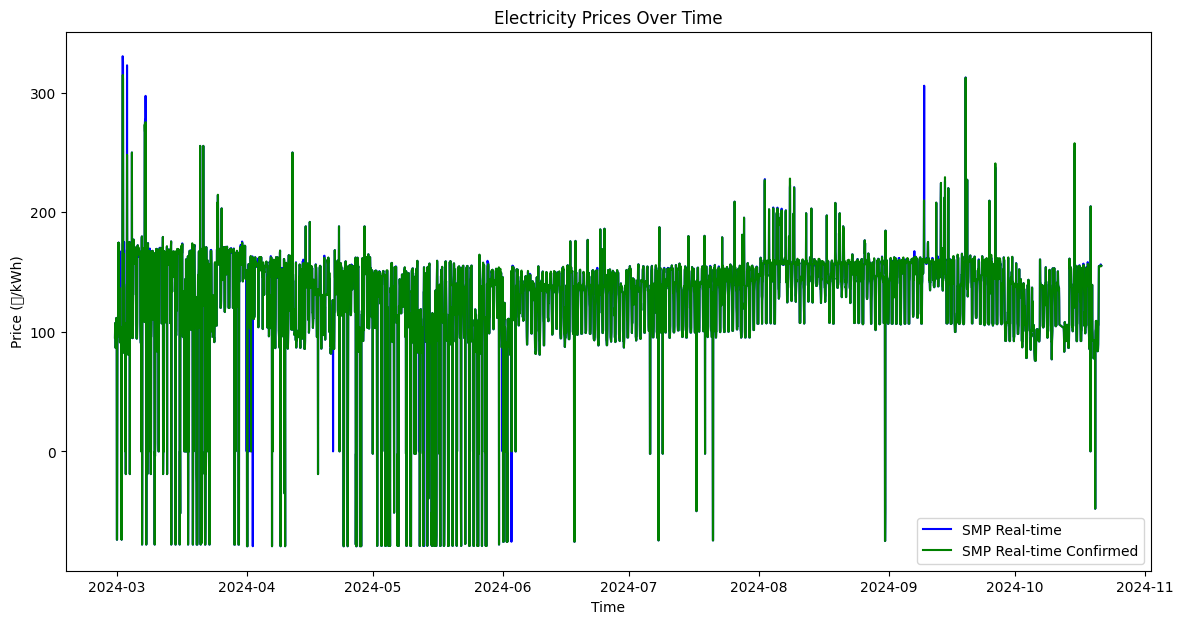

In [19]:
# 날짜 컬럼을 datetime 형식으로 변환
today['timestamp'] = pd.to_datetime(today['timestamp'])

# 1. 시계열 그래프 (Line Plot)
plt.figure(figsize=(14, 7))
plt.plot(today['timestamp'], today['smp_rt'], label='SMP Real-time', color='blue')
plt.plot(today['timestamp'], today['smp_rc'], label='SMP Real-time Confirmed', color='green')
#plt.plot(today['timestamp'], today['smp_da'], label='SMP Day-Ahead', color='red')
plt.xlabel('Time')
plt.ylabel('Price (원/kWh)')
plt.title('Electricity Prices Over Time')
plt.legend()
plt.show()

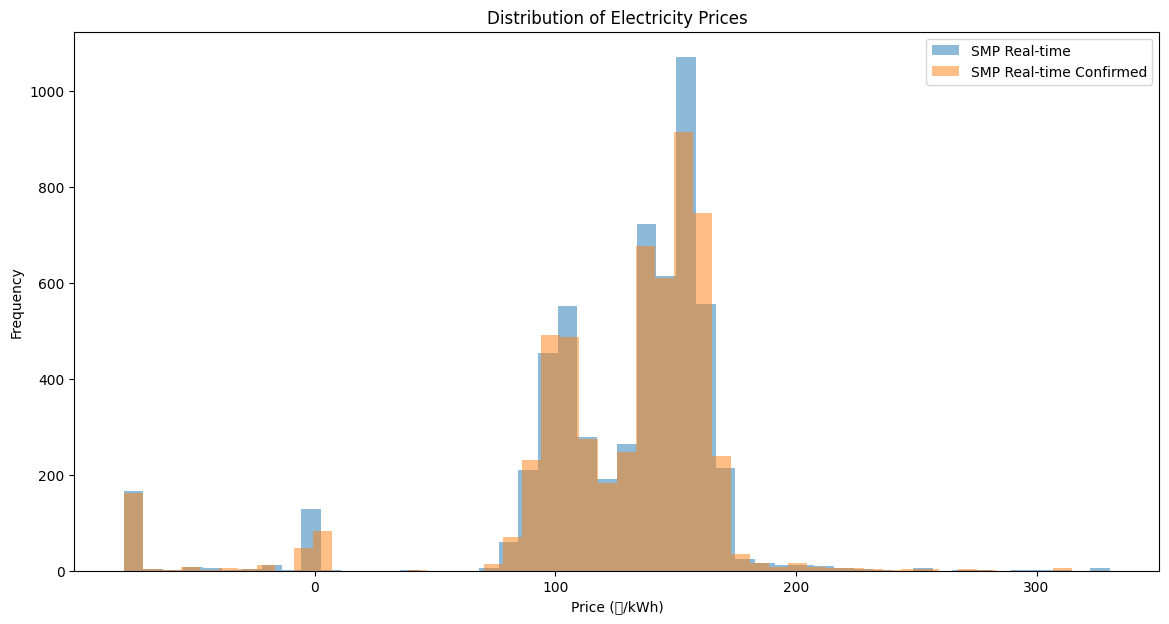

In [21]:
plt.figure(figsize=(14, 7))
plt.hist(today['smp_rt'], bins=50, alpha=0.5, label='SMP Real-time')
plt.hist(today['smp_rc'], bins=50, alpha=0.5, label='SMP Real-time Confirmed')
#plt.hist(today['smp_da'], bins=50, alpha=0.5, label='SMP Day-Ahead')
plt.xlabel('Price (원/kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Electricity Prices')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


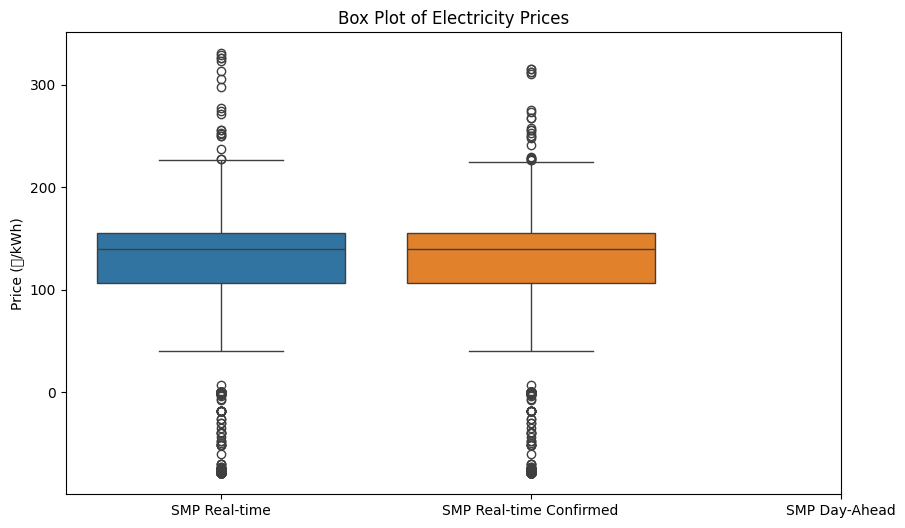

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=today[['smp_rt', 'smp_rc']])
plt.xticks([0, 1, 2], ['SMP Real-time', 'SMP Real-time Confirmed', 'SMP Day-Ahead'])
plt.ylabel('Price (원/kWh)')
plt.title('Box Plot of Electricity Prices')
plt.show()

In [27]:
yesterday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         5665 non-null   int64         
 1   smp_da     5665 non-null   float64       
 2   timestamp  5665 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 132.9 KB


In [28]:
today.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617 entries, 0 to 5616
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         5617 non-null   int64         
 1   smp_rt     5617 non-null   float64       
 2   smp_rc     5617 non-null   float64       
 3   timestamp  5617 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 175.7 KB


### 2) 시장 전기 가격 - 현황 데이터

| 데이터 | 단위 | 설명 |
| --- | --- | --- |
| 공급능력 (Supply Power) | kW | 제주 전력시장의 전체 공급 가능한 전력량 |
| 현재수요 (Present Load) | kW | 제주 전력시장의 현재 전력 수요 |
| 태양광 발전량 (Power Solar) | kW | 제주 전력시장의 태양광 발전량 |
| 풍력 발전량 (Power Wind) | kW | 제주 전력시장의 풍력 발전량 |
| 신재생 발전량 총합 (Renewable Energy Total) | kW | 제주 전력시장의 신재생 에너지 발전량 총합 (풍력 + 태양광 + 기타 신재생E) |
| 공급 예비력 (Supply Capacity) | kW | 제주 전력시장의 공급력에서 현재 수요를 뺀 나머지 여유 전력 |
| 운영 예비력 (Operation Capacity) | kW | 제주 전력시장의 실질적으로 사용할 수 있는 운영상의 예비 전력 (시스템 안정성의 이유로 남겨놓은 여유 전력) |

In [25]:
now = pd.read_csv("/content/data/제주전력시장_현황데이터.csv")
now.columns = ['ts', 'supply_power', 'present_load', 'power_solar', 'power_wind', 'renewable_energy_total', 'supply_capacity', 'operation_capacity']
now['timestamp'] = pd.to_datetime(now['ts'], unit='s')

now

,ts,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,timestamp
0,1704034800,1298000.0,769000.0,0.0,125426.0,133103.0,529000.0,323000.0,2023-12-31 15:00:00
1,1704035100,1299000.0,761000.0,0.0,130393.0,137867.0,538000.0,339000.0,2023-12-31 15:05:00
2,1704035400,1290000.0,755000.0,0.0,120691.0,128133.0,534000.0,335000.0,2023-12-31 15:10:00
3,1704035700,1277000.0,756000.0,0.0,107771.0,115519.0,521000.0,325000.0,2023-12-31 15:15:00
4,1704036000,1269000.0,753000.0,0.0,99264.4,107153.0,515000.0,318000.0,2023-12-31 15:20:00
...,...,...,...,...,...,...,...,...,...
84075,1729607700,1254000.0,624000.0,0.0,247628.0,256210.0,625000.0,277000.0,2024-10-22 14:35:00
84076,1729608000,1248000.0,618000.0,0.0,246598.0,255217.0,627000.0,277000.0,2024-10-22 14:40:00
84077,1729608300,1255000.0,621000.0,0.0,251494.0,260161.0,630000.0,281000.0,2024-10-22 14:45:00
84078,1729608600,1259000.0,612000.0,0.0,252912.0,261535.0,642000.0,290000.0,2024-10-22 14:50:00


In [26]:
now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84080 entries, 0 to 84079
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ts                      84080 non-null  int64         
 1   supply_power            84080 non-null  float64       
 2   present_load            84080 non-null  float64       
 3   power_solar             84080 non-null  float64       
 4   power_wind              84080 non-null  float64       
 5   renewable_energy_total  84080 non-null  float64       
 6   supply_capacity         84080 non-null  float64       
 7   operation_capacity      84080 non-null  float64       
 8   timestamp               84080 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 5.8 MB


In [29]:
now.describe()

,ts,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,timestamp
count,8.408000e+04,8.408000e+04,8.408000e+04,84080.000000,84080.000000,84080.000000,8.408000e+04,84080.000000,84080
mean,1.716812e+09,1.322336e+06,7.525809e+05,58422.924024,63258.878585,132441.744109,5.682495e+05,357051.700761,2024-05-27 12:19:54.822787584
min,1.704035e+09,0.000000e+00,4.110000e+05,0.000000,0.000000,0.000000,-4.460000e+05,-26000.000000,2023-12-31 15:00:00
25%,1.710373e+09,1.224000e+06,6.480000e+05,0.000000,9098.402500,45075.800000,4.630000e+05,294000.000000,2024-03-13 23:38:45
50%,1.716862e+09,1.316000e+06,7.360000e+05,6729.785000,40634.900000,108938.500000,5.680000e+05,346000.000000,2024-05-28 02:12:30
75%,1.723242e+09,1.418000e+06,8.410000e+05,95464.900000,100348.500000,202622.250000,6.690000e+05,407000.000000,2024-08-09 22:21:15
max,1.729609e+09,1.774000e+06,1.250000e+06,371526.000000,313191.000000,506193.000000,1.160000e+06,801000.000000,2024-10-22 15:00:00
std,7.406428e+06,1.368495e+05,1.413282e+05,86813.184606,64356.464814,101403.332286,1.575033e+05,93662.794200,NaN


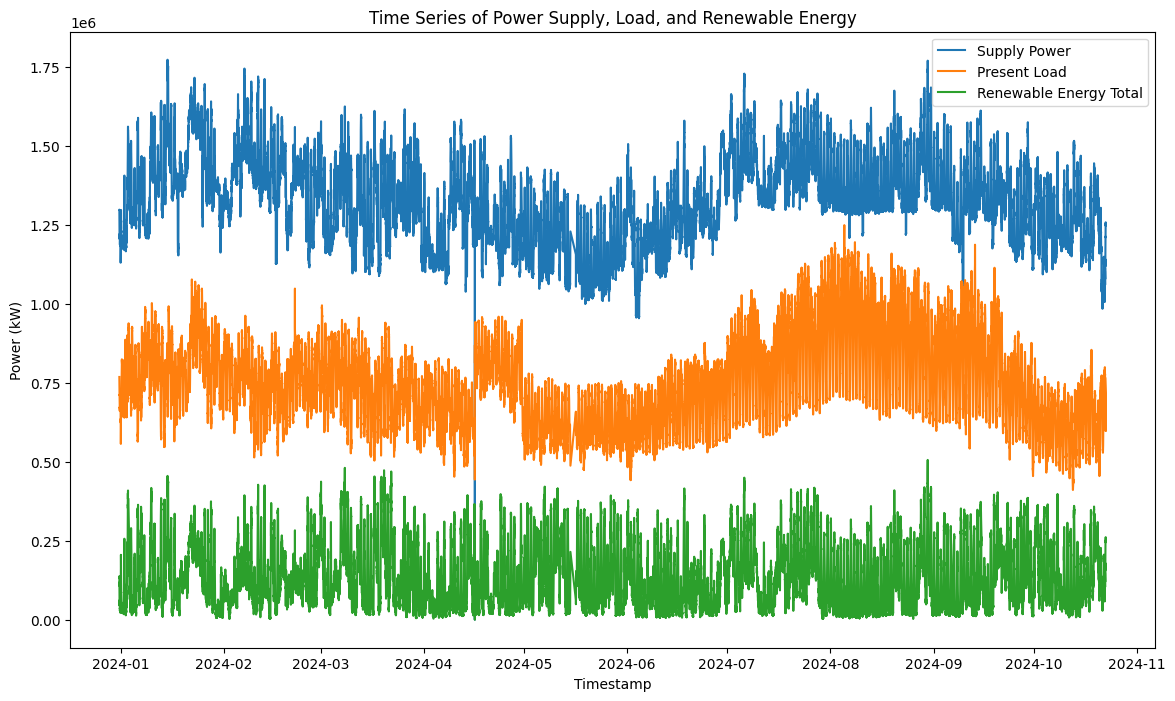

In [30]:
df = now.copy()

plt.figure(figsize=(14, 8))
plt.plot(df['timestamp'], df['supply_power'], label='Supply Power')
plt.plot(df['timestamp'], df['present_load'], label='Present Load')
plt.plot(df['timestamp'], df['renewable_energy_total'], label='Renewable Energy Total')
plt.xlabel('Timestamp')
plt.ylabel('Power (kW)')
plt.title('Time Series of Power Supply, Load, and Renewable Energy')
plt.legend()
plt.show()

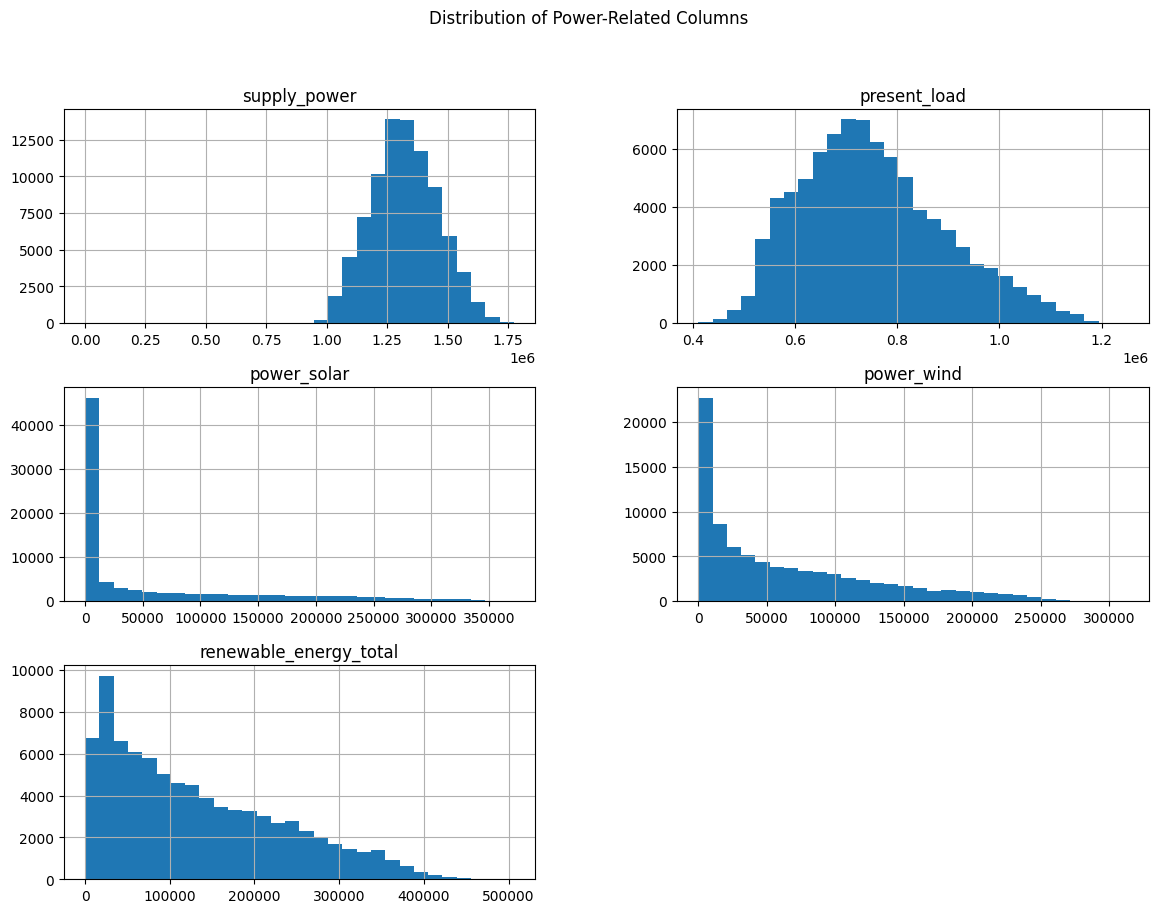

In [31]:
df[['supply_power', 'present_load', 'power_solar', 'power_wind', 'renewable_energy_total']].hist(bins=30, figsize=(14, 10))
plt.suptitle("Distribution of Power-Related Columns")
plt.show()

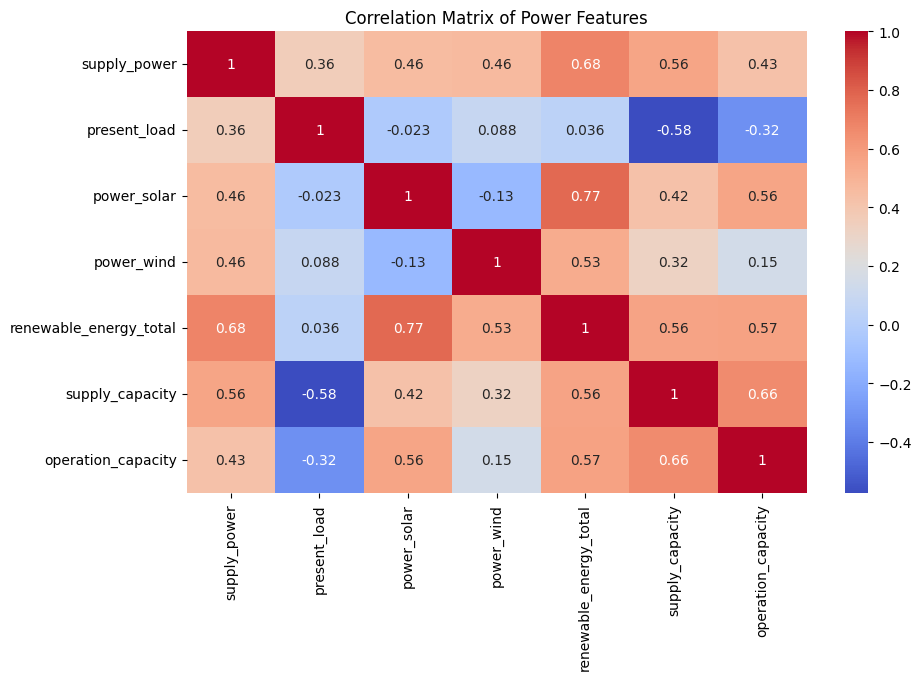

In [32]:
plt.figure(figsize=(10, 6))
correlation = df[['supply_power', 'present_load', 'power_solar', 'power_wind', 'renewable_energy_total', 'supply_capacity', 'operation_capacity']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Power Features")
plt.show()

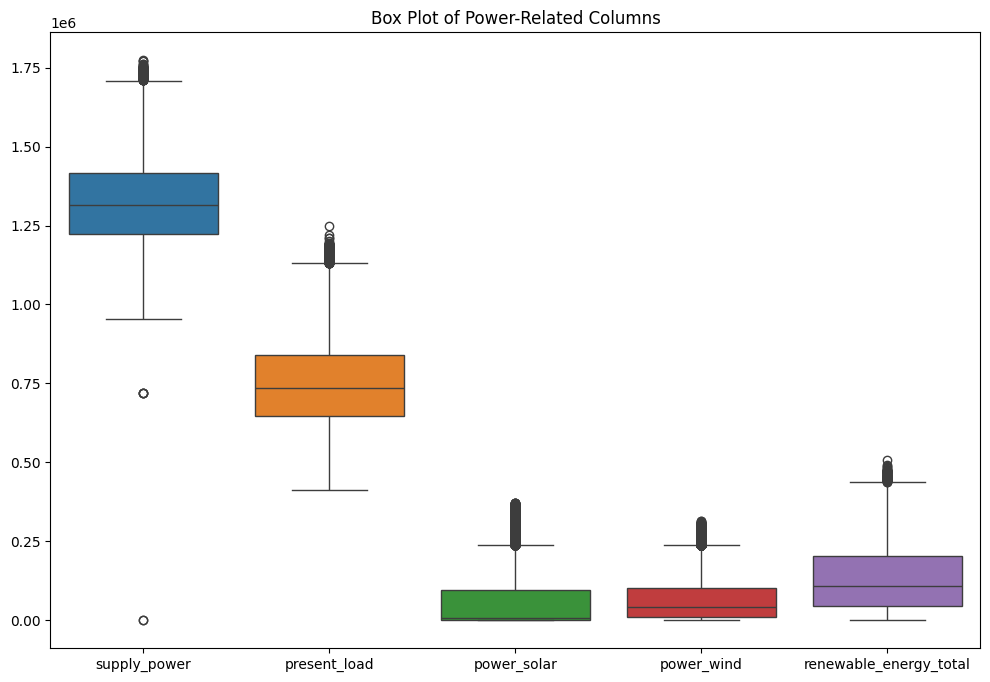

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['supply_power', 'present_load', 'power_solar', 'power_wind', 'renewable_energy_total']])
plt.title("Box Plot of Power-Related Columns")
plt.show()

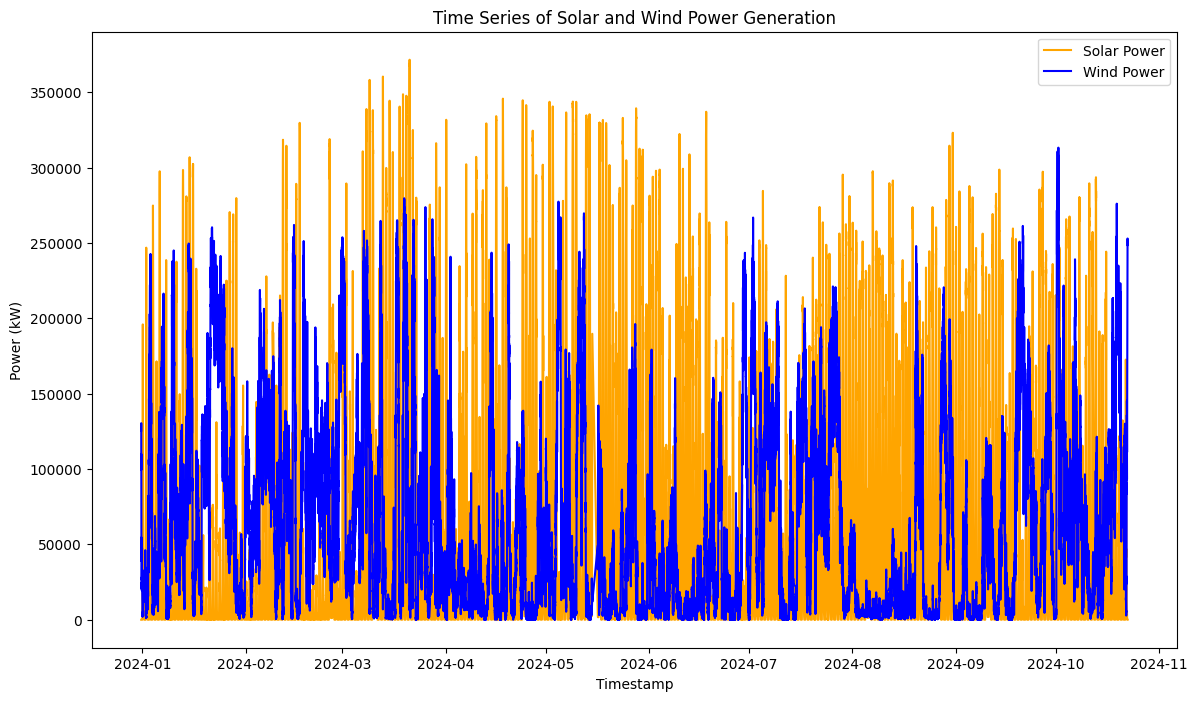

In [34]:
plt.figure(figsize=(14, 8))
plt.plot(df['timestamp'], df['power_solar'], label='Solar Power', color='orange')
plt.plot(df['timestamp'], df['power_wind'], label='Wind Power', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Power (kW)')
plt.title('Time Series of Solar and Wind Power Generation')
plt.legend()
plt.show()

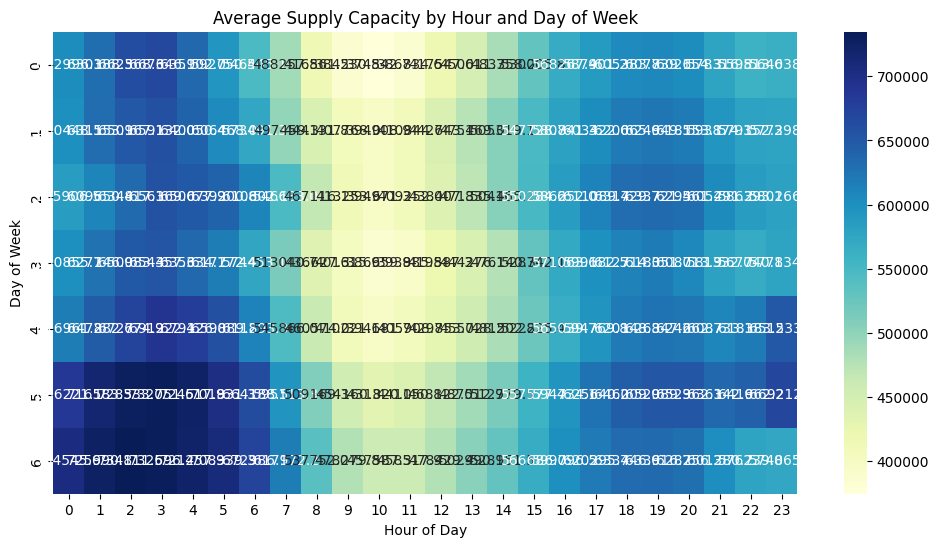

In [36]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.dayofweek
heatmap_data = df.pivot_table(values='supply_capacity', index='day', columns='hour', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Average Supply Capacity by Hour and Day of Week')
plt.show()

### 3) 기상 실측, 예측 1

In [41]:
real1 = pd.read_csv("/content/data/기상실측데이터_1.csv")
predict1 = pd.read_csv("/content/data/기상예측데이터_1.csv")

real1['timestamp'] = pd.to_datetime(real1['ts'], unit='s', errors='coerce')
predict1['timestamp'] = pd.to_datetime(predict1['ts'], unit='s', errors='coerce')

print(real1.shape, predict1.shape)

<ipython-input-41-2bc794dba2dc>:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  real1['timestamp'] = pd.to_datetime(real1['ts'], unit='s', errors='coerce')
<ipython-input-41-2bc794dba2dc>:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  predict1['timestamp'] = pd.to_datetime(predict1['ts'], unit='s', errors='coerce')


(64657, 20) (53108, 24)


In [45]:
real1

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h,timestamp
0,Ilgwa-ri,1709222220,6.9,2.4,2.4,69.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.3,3.3,4.5,0.0,2024-02-29 15:57:00
1,Ilgwa-ri,1709222580,7.1,2.7,2.7,68.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.9,3.9,4.6,0.0,2024-02-29 16:03:00
2,Ilgwa-ri,1709226120,6.3,0.9,0.9,64.0,-0.1,338.0,22.0,22.0,0.0,16.1,91.0,579.0,1018.6,7.2,2.2,3.5,0.0,2024-02-29 17:02:00
3,Ilgwa-ri,1709229420,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,12192.0,1023.0,6.7,0.6,2.9,0.0,2024-02-29 17:57:00
4,Ilgwa-ri,1709229840,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,3018.0,1024.0,6.7,0.6,2.9,0.0,2024-02-29 18:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64652,Sangmo-ri,1729594920,20.0,18.0,18.0,100.0,20.0,293.0,37.8,37.8,0.0,14.5,76.0,579.0,1014.6,20.6,20.0,20.0,0.0,2024-10-22 11:02:00
64653,Sangmo-ri,1729598520,19.8,16.9,16.9,100.0,19.8,293.0,41.8,41.8,0.0,14.5,91.0,579.0,1014.2,20.6,20.0,19.8,0.1,2024-10-22 12:02:00
64654,Sangmo-ri,1729601760,21.2,18.5,18.5,92.0,19.9,315.0,49.7,49.7,0.0,22.5,99.0,457.0,1015.0,21.7,21.1,20.4,0.0,2024-10-22 12:56:00
64655,Sangmo-ri,1729602120,19.6,16.7,16.7,100.0,19.6,315.0,49.7,49.7,0.0,22.5,99.0,518.0,1013.9,20.6,19.4,19.5,0.0,2024-10-22 13:02:00


In [44]:
predict1

,location,base_ts,ts,temp,real_feel_temp,wet_bulb_temp,dew_point,wind_dir,wind_spd,wind_gust_spd,...,precip_prob,rain_prob,snow_prob,ice_prob,total_liq,rain,snow,ice,cld_cvr,timestamp
0,Ilgwa-ri,1709258400,1709305200,3.33333,-3.88889,1.11111,-2.77778,343.0,27.8417,59.2239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,2024-03-01 15:00:00
1,Ilgwa-ri,1709258400,1709308800,3.33333,-3.88889,1.11111,-2.77778,342.0,27.8417,59.2239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,2024-03-01 16:00:00
2,Ilgwa-ri,1709258400,1709312400,3.33333,-4.44444,1.11111,-2.77778,342.0,27.8417,59.2239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,2024-03-01 17:00:00
3,Ilgwa-ri,1709258400,1709316000,2.77778,-4.44444,1.11111,-2.22222,341.0,29.6119,57.4536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,2024-03-01 18:00:00
4,Ilgwa-ri,1709258400,1709319600,3.33333,-4.44444,1.11111,-2.77778,341.0,29.6119,57.4536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,2024-03-01 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53103,Sangmo-ri,1729562400,1729681200,17.2222,15.0,13.8889,11.1111,353.0,22.2089,53.7521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2024-10-23 11:00:00
53104,Sangmo-ri,1729562400,1729684800,17.2222,14.4444,13.8889,11.1111,356.0,22.2089,51.8209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2024-10-23 12:00:00
53105,Sangmo-ri,1729562400,1729688400,16.6667,13.8889,13.3333,10.5556,359.0,20.4387,51.8209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2024-10-23 13:00:00
53106,Sangmo-ri,1729562400,1729692000,16.1111,13.3333,13.3333,10.5556,2.0,20.4387,50.0506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2024-10-23 14:00:00


#### real1 개별 시각화

In [46]:
df = real1.copy()

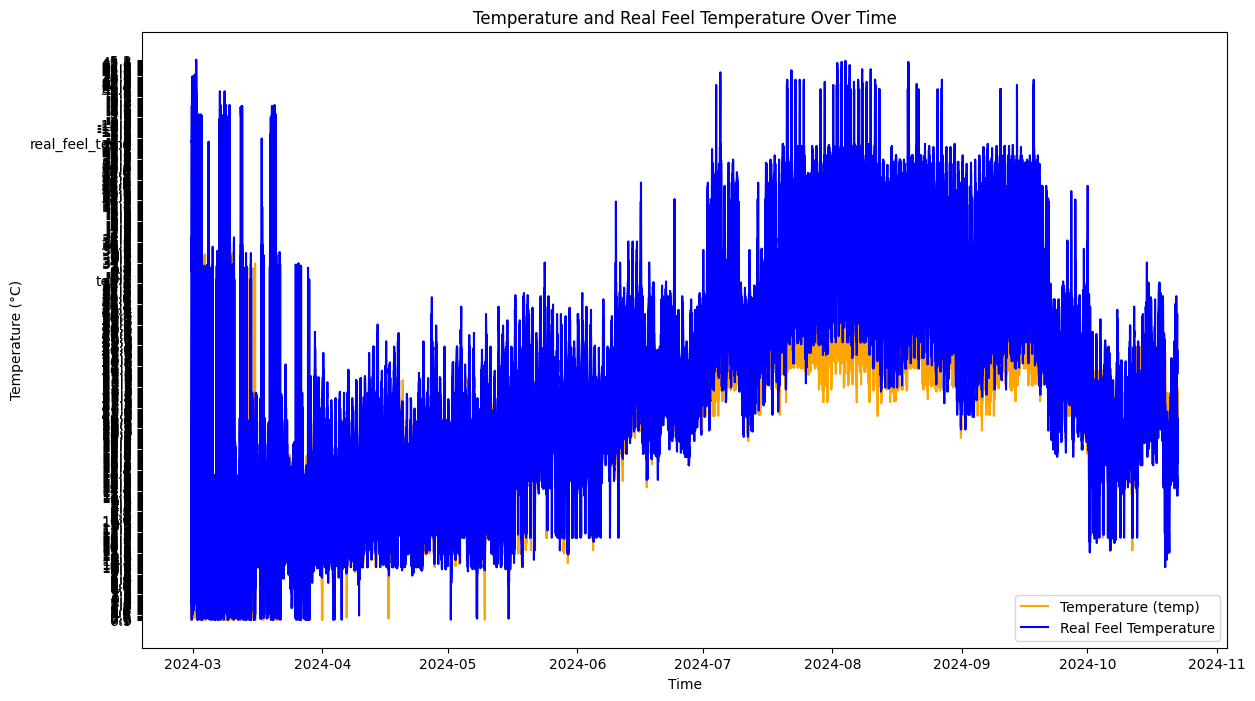

In [47]:
plt.figure(figsize=(14, 8))
plt.plot(df['timestamp'], df['temp'], label='Temperature (temp)', color='orange')
plt.plot(df['timestamp'], df['real_feel_temp'], label='Real Feel Temperature', color='blue')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature and Real Feel Temperature Over Time')
plt.legend()
plt.show()

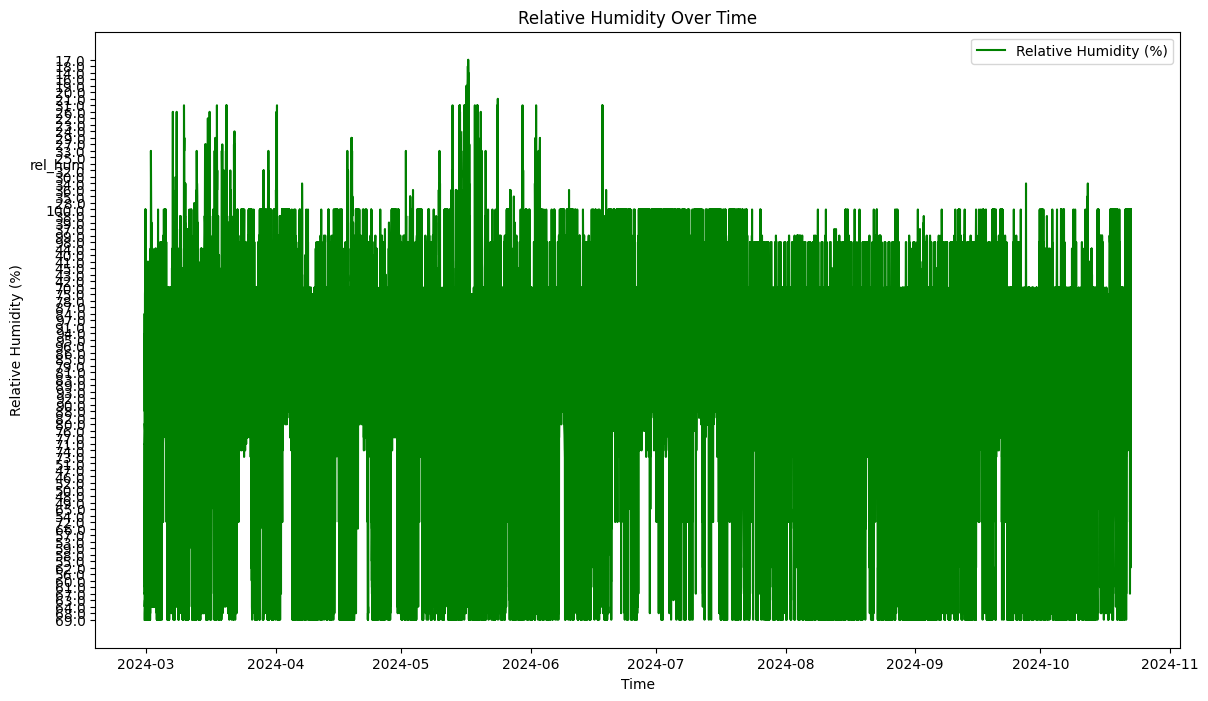

In [48]:
plt.figure(figsize=(14, 8))
plt.plot(df['timestamp'], df['rel_hum'], label='Relative Humidity (%)', color='green')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over Time')
plt.legend()
plt.show()

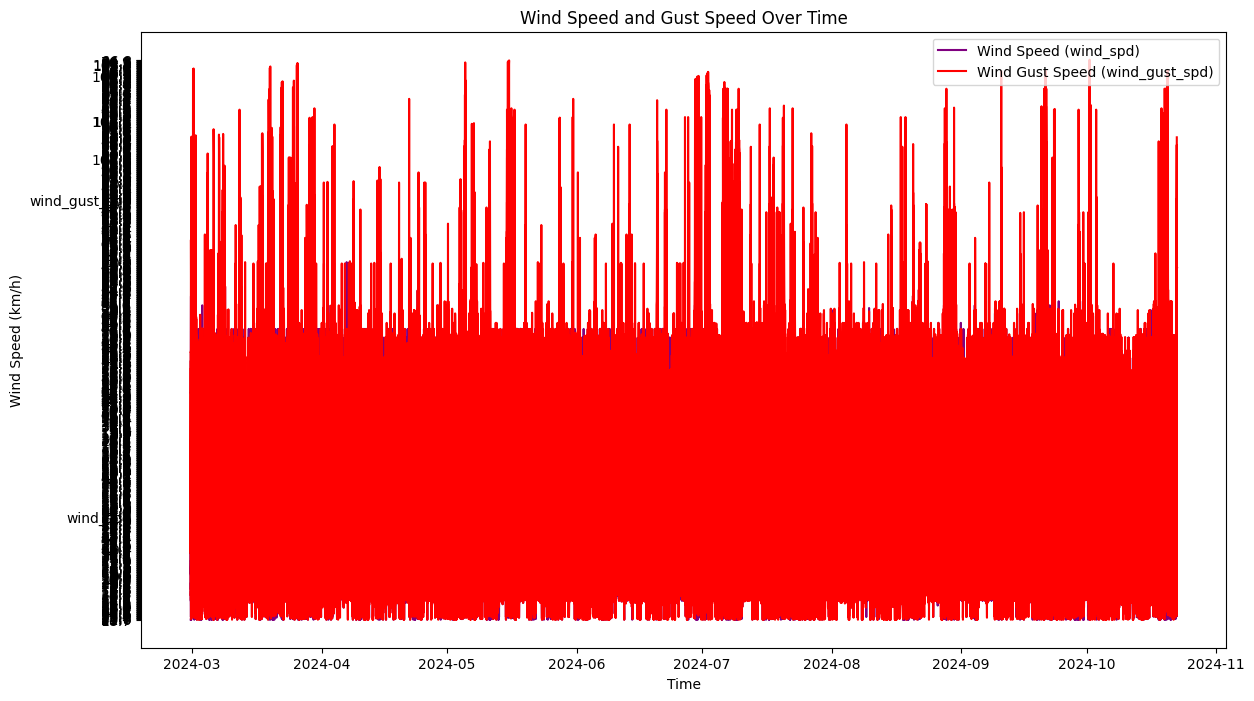

In [49]:
plt.figure(figsize=(14, 8))
plt.plot(df['timestamp'], df['wind_spd'], label='Wind Speed (wind_spd)', color='purple')
plt.plot(df['timestamp'], df['wind_gust_spd'], label='Wind Gust Speed (wind_gust_spd)', color='red')
plt.xlabel('Time')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed and Gust Speed Over Time')
plt.legend()
plt.show()

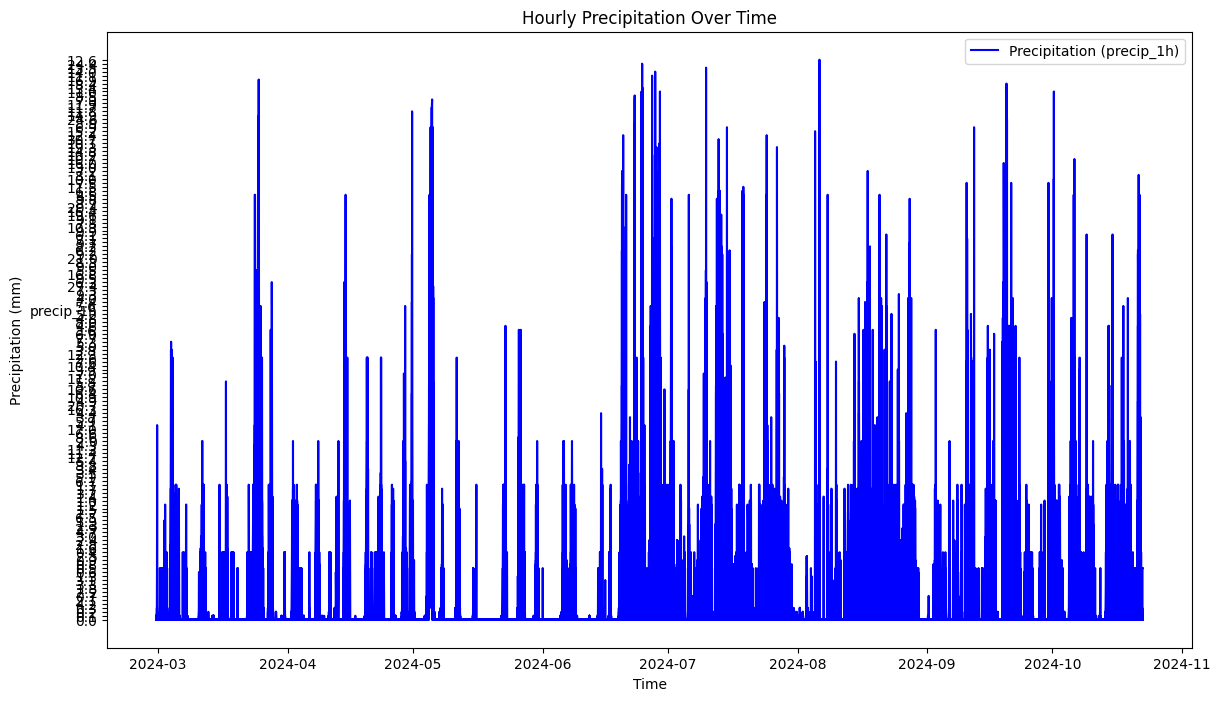

In [50]:
plt.figure(figsize=(14, 8))
plt.plot(df['timestamp'], df['precip_1h'], label='Precipitation (precip_1h)', color='blue')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Hourly Precipitation Over Time')
plt.legend()
plt.show()

#### predict1 개별 시각화

In [52]:
df = predict1.copy()

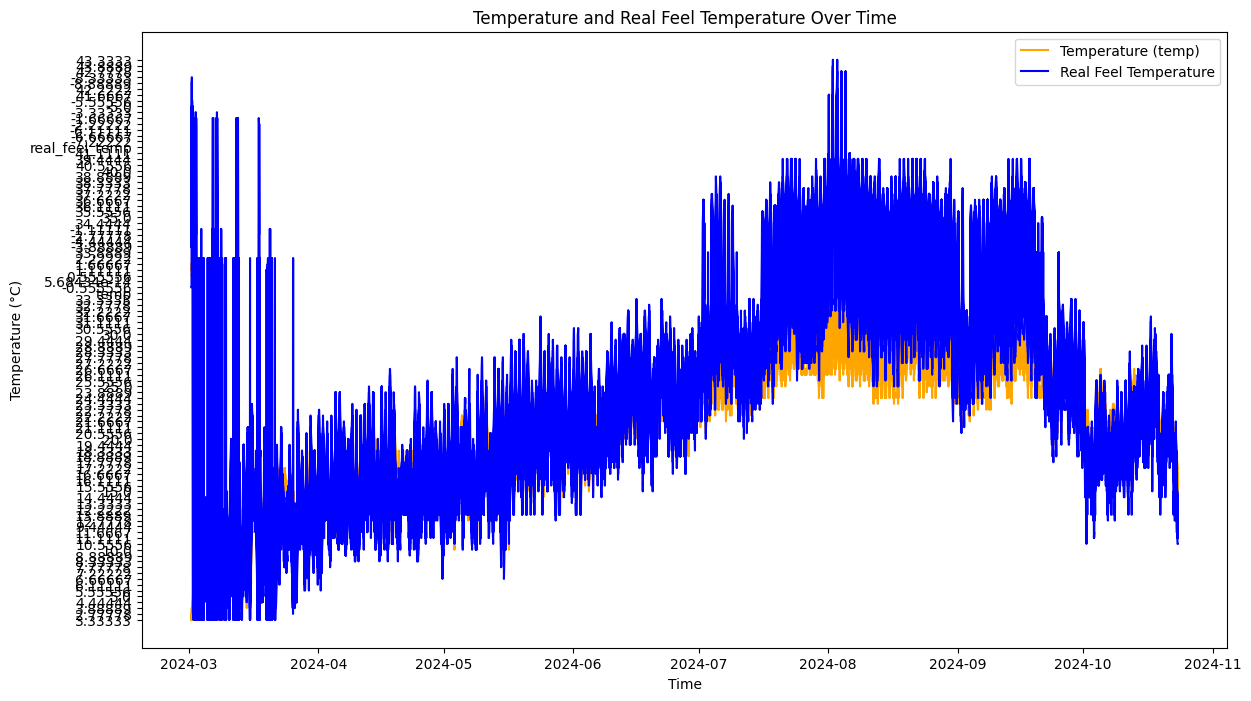

In [53]:
plt.figure(figsize=(14, 8))
plt.plot(df['timestamp'], df['temp'], label='Temperature (temp)', color='orange')
plt.plot(df['timestamp'], df['real_feel_temp'], label='Real Feel Temperature', color='blue')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature and Real Feel Temperature Over Time')
plt.legend()
plt.show()

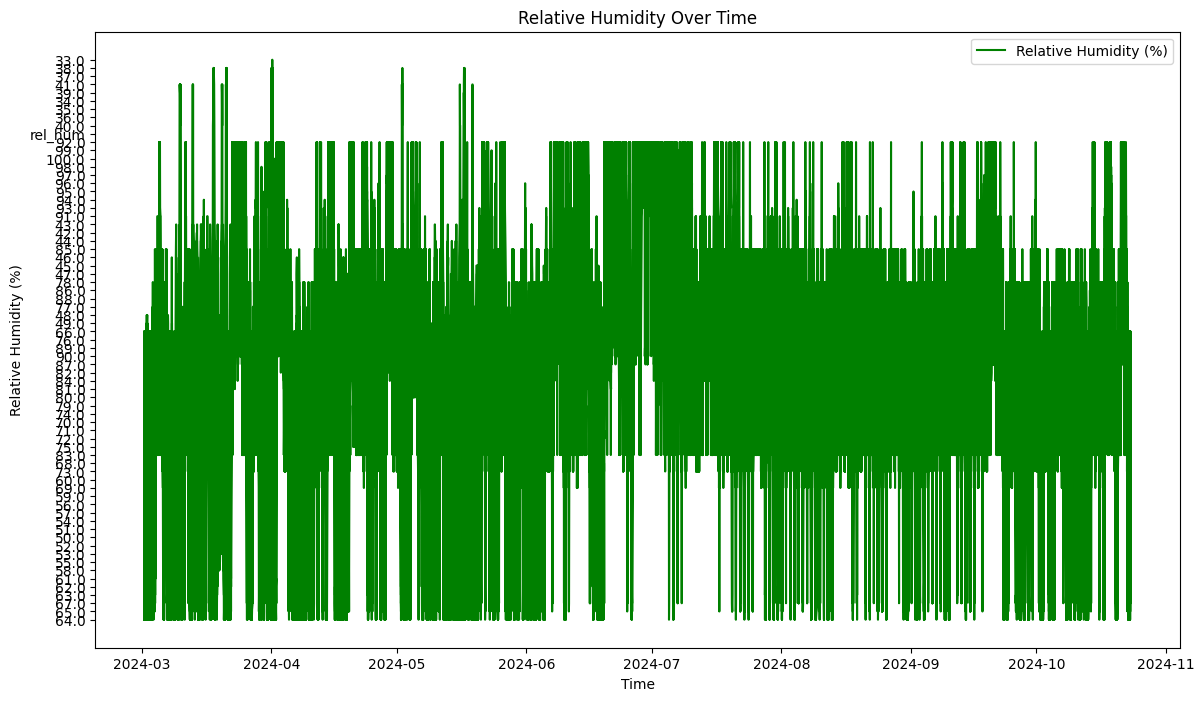

In [54]:
plt.figure(figsize=(14, 8))
plt.plot(df['timestamp'], df['rel_hum'], label='Relative Humidity (%)', color='green')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over Time')
plt.legend()
plt.show()

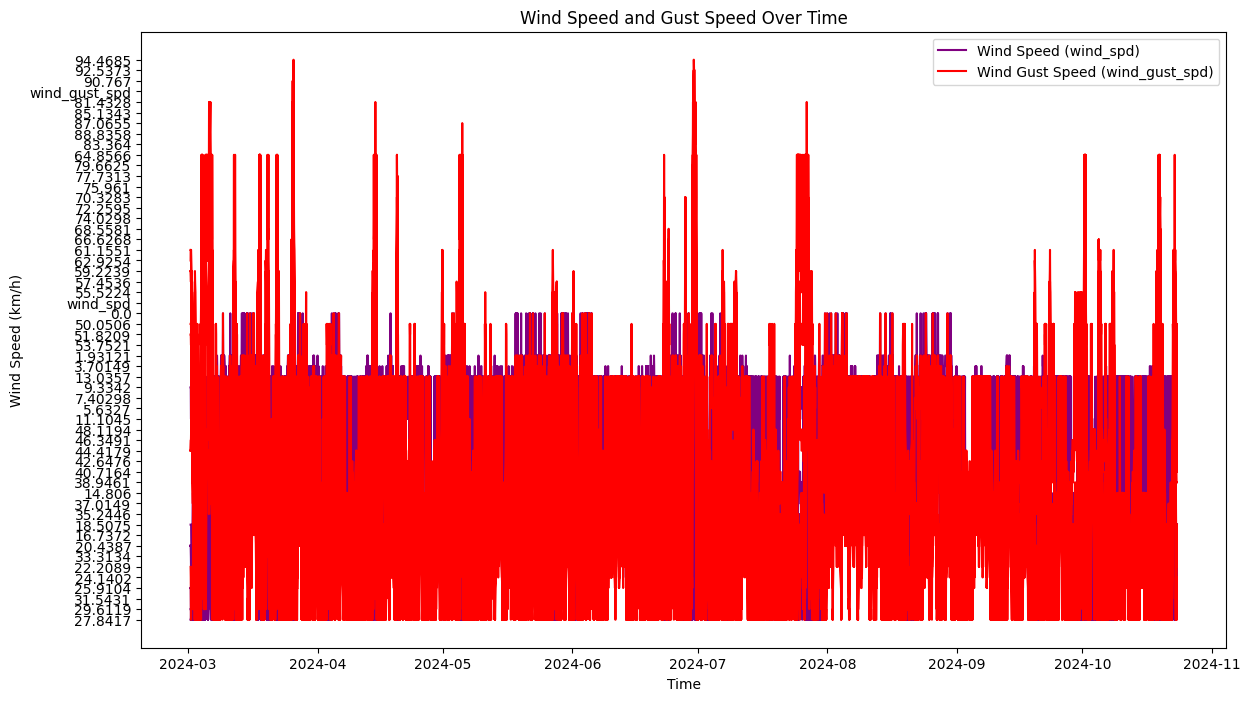

In [55]:
plt.figure(figsize=(14, 8))
plt.plot(df['timestamp'], df['wind_spd'], label='Wind Speed (wind_spd)', color='purple')
plt.plot(df['timestamp'], df['wind_gust_spd'], label='Wind Gust Speed (wind_gust_spd)', color='red')
plt.xlabel('Time')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed and Gust Speed Over Time')
plt.legend()
plt.show()

### 4) 기상 실측, 예측 2

In [57]:
real2 = pd.read_csv("/content/data/기상실측데이터_2.csv")
predict2 = pd.read_csv("/content/data/기상예측데이터_2.csv")

real2['timestamp'] = pd.to_datetime(real2['ts'], unit='s', errors='coerce')
predict2['timestamp'] = pd.to_datetime(predict2['ts'], unit='s', errors='coerce')

print(real2.shape, predict2.shape)

<ipython-input-57-7d5c7cc54566>:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  real2['timestamp'] = pd.to_datetime(real2['ts'], unit='s', errors='coerce')
<ipython-input-57-7d5c7cc54566>:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  predict2['timestamp'] = pd.to_datetime(predict2['ts'], unit='s', errors='coerce')


(34012, 13) (17702, 14)


In [58]:
real2

,location,ts,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow,timestamp
0,Gaigeturi,1709218856,80.0,8.03,8.03,8.03,73.0,1023.0,10.34,352.0,0.0,0.0,2024-02-29 15:00:56
1,Gaigeturi,1709220664,75.0,8.03,8.03,8.03,66.0,1022.0,3.09,340.0,0.0,0.0,2024-02-29 15:31:04
2,Gaigeturi,1709222454,85.0,7.75,7.75,7.75,71.0,1023.0,11.28,350.0,0.0,0.0,2024-02-29 16:00:54
3,Gaigeturi,1709224276,75.0,8.03,8.03,8.03,66.0,1022.0,4.63,340.0,0.0,0.0,2024-02-29 16:31:16
4,Gaigeturi,1709226058,88.0,7.11,7.11,7.11,66.0,1024.0,11.8,352.0,0.31,0.0,2024-02-29 17:00:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34007,Jeju,1729600283,75.0,21.96,21.96,21.96,83.0,1016.0,6.17,270.0,0.53,0.0,2024-10-22 12:31:23
34008,Jeju,1729602067,75.0,19.96,19.96,19.96,94.0,1016.0,10.8,300.0,0.53,0.0,2024-10-22 13:01:07
34009,Jeju,1729603843,75.0,19.96,19.96,19.96,88.0,1016.0,10.8,290.0,0.48,0.0,2024-10-22 13:30:43
34010,Jeju,1729605674,100.0,20.29,20.29,20.29,92.0,1016.0,9.07,299.0,0.48,0.0,2024-10-22 14:01:14


In [59]:
predict2

,location,base_ts,ts,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow,timestamp
0,Gaigeturi,1709258400,1709305200,100.0,3.23,3.23,3.23,59.0,1027.0,9.59,337.0,0.0,0.0,2024-03-01 15:00:00
1,Gaigeturi,1709258400,1709308800,100.0,3.3,3.3,3.3,59.0,1027.0,9.28,338.0,0.0,0.0,2024-03-01 16:00:00
2,Gaigeturi,1709258400,1709312400,100.0,3.35,3.35,3.35,59.0,1027.0,8.82,337.0,0.0,0.0,2024-03-01 17:00:00
3,Gaigeturi,1709258400,1709316000,100.0,3.35,3.35,3.35,59.0,1026.0,8.42,338.0,0.0,0.0,2024-03-01 18:00:00
4,Gaigeturi,1709258400,1709319600,99.0,3.43,3.43,3.43,59.0,1026.0,8.24,337.0,0.0,0.0,2024-03-01 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17697,Jeju,1729562400,1729681200,0.0,16.01,16.01,16.01,66.0,1021.0,5.25,342.0,0.0,0.0,2024-10-23 11:00:00
17698,Jeju,1729562400,1729684800,16.0,15.95,15.95,15.95,67.0,1021.0,5.22,346.0,0.0,0.0,2024-10-23 12:00:00
17699,Jeju,1729562400,1729688400,1.0,15.67,15.67,15.67,68.0,1021.0,4.54,349.0,0.0,0.0,2024-10-23 13:00:00
17700,Jeju,1729562400,1729692000,0.0,15.59,15.59,15.59,68.0,1022.0,4.33,353.0,0.0,0.0,2024-10-23 14:00:00
